- define starting node
- run spreading model
- plot result
    

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')

In [3]:
# Specify the number of random nodes you want
num_random_nodes = 10  # You can change this number as needed

#select one raqndom node:
random_node = random.choice([i for i in range(G.number_of_nodes())])

# Select multiple random nodes
random_nodes = random.sample(range(G.number_of_nodes()), num_random_nodes)

random_nodes_set = set(random_nodes)
print(random_nodes_set)

{67, 996, 70, 1192, 239, 1043, 213, 1239, 60, 799}


In [4]:
# Modified SI function using threshold
def new_infected_threshold(G, I, kappa, t):
    '''SI function which uses thresholds to determine which new 
    nodes are infected by their neighbours in one step of the infection process.
    
    Args:
        G (nx.Graph): Graph to perform algorithm on
        I (set): Set of already infected nodes
        kappa (int): Threshold
        t (int): Time step of current infection step

    Return:
        new_infected (set): Set of newly infected nodes.
    '''

    # Create a new set of the newly infected nodes
    new_infected = set()

    # Check if time step t is 1 and set threshold to 1 if true
    if t == 1:
        kappa = 1

    # Iterate over all nodes in the network which are not already infected
    for u in set(G.nodes) - I:

        # Check if the amount of infected neighbors passes the threshold
        if len(set(G.neighbors(u)) & I) >= kappa:
            new_infected.add(u)

    return new_infected

In [5]:
def threshold_infection_process(G, s, kappa):
    '''Perform SI infection process on a complete network using threshold reinforcement.
    
    Args:
        G (nx.Graph): Graph to perform algorithm on
        s (int): Starting node for the infection process
        kappa (int): Threshold

    Return:
        I (set): Set of infected nodes
        t (int): Time step reached when spreading stopped
    '''

    I = {s} # Set of infected nodes, starts with only staring node infected
    t = 0 # Initialize time step

    # Time step loop, continues until all nodes are infected
    while len(I) < len(G.nodes):

        # Increment t
        t += 1

        # Find new infected nodes
        new_infected = new_infected_threshold(G, I, kappa, t)

        # # Print for debugging
        #print(f"Time step {t}: Newly infected nodes: {new_infected}")

        # Break if no new nodes are infected
        if len(new_infected) == 0:
            break

        # Add new infected nodes to I
        I = I.union(new_infected)

        # # Print for debugging
        # print(f"Time step {t}: Infected nodes: {I}")

    return I, t

In [6]:
threshold_infection_process(G, random_node, 1)

({1133}, 1)

In [7]:
def get_starting_nodes(G, method):  
    if method == 'degree':
        # Calculate degree centrality
        node_dict = nx.degree_centrality(G)
    
    elif method  == 'closeness':
        node_dict = nx.closeness_centrality(G)

    elif method == 'betweenness':
        node_dict = nx.betweenness_centrality(G)
    
    elif method  == 'eigenvector':
        node_dict = nx.eigenvector_centrality(G)
    
    elif method == 'katz':
        node_dict = nx.katz_centrality(G)
    
    elif method == 'harmonic':
        node_dict = nx.harmonic_centrality(G)
    
    # Sort the dictionary items in descending order based on centrality values
    sorted_nodes = sorted(node_dict.items(), key=lambda x: x[1], reverse=True)
        
    top_10 = sorted_nodes[:10]
        
    # Extract only the node IDs from the sorted list
    top_10_node_ids = [node for node, _ in top_10]


    # Display the node IDs
    #print(top_10_node_ids)
    #print(top_10)
    return top_10_node_ids


In [8]:
get_starting_nodes(G, 'degree')

['17', '41', '19', '49', '13', '537', '45', '38', '120', '192']

In [9]:
# Create multiple DataFrames
data_frames = [
    {'T': ['0', '1', '2', '3', '4'],
     'IR': [0.1, 0.2, 0.3, 0.6, 0.9]},
    
    {'T': ['0', '1', '2', '3', '4'],
     'IR': [0.2, 0.3, 0.4, 0.6, 0.9]}
]


In [14]:
def plot_methods(data_frames):
    methods = ['1', '2']
    # Define a custom color palette
    custom_palette = ['green', 'hotpink']  # Add more colors if needed
    # Create a graph with the different df's
    for i, df_data in enumerate(data_frames):
        sns.lineplot(data=df_data, x='T', y='IR', label=f'Method {methods[i]}', color=custom_palette[i])   


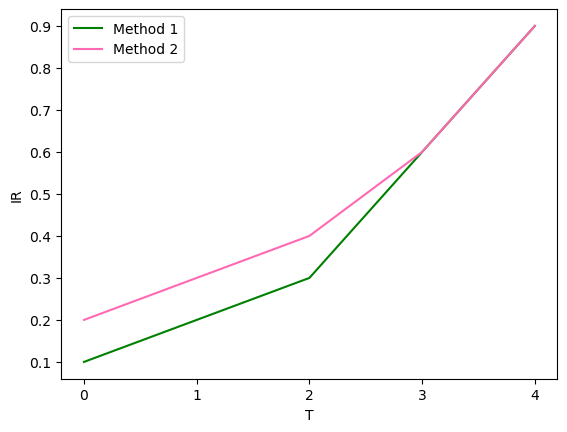

In [15]:
plot_methods(data_frames)